In [2]:
import pandas as pd

data = pd.read_csv('data/wholesale_customers.csv')
data.head()
data = data.loc[:, (data.columns != 'Channel') & (data.columns != 'Region')]
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [3]:
data_statistics = []
for column in data.columns:
    # print(f'\nAverage of {column}: {data[column].mean()}')
    # print(f'Standard deviation of {column}: {data[column].std()}')
    # print(f'Minimum of {column}: {data[column].min()}')
    # print(f'Maximum of {column}: {data[column].max()}')
    data_statistics.append([round(data[column].mean()),round(data[column].std()),data[column].min(),data[column].max()])
df = pd.DataFrame(data_statistics, columns=['mean', 'std', 'min', 'max'])
df.set_index(data.columns)

,mean,std,min,max
Fresh,12000,12647,3,112151
Milk,5796,7380,55,73498
Grocery,7951,9503,3,92780
Frozen,3072,4855,25,60869
Detergents_Paper,2881,4768,3,40827
Delicassen,1525,2820,3,47943


In [9]:
for 

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [12]:
import sklearn.cluster as cluster


def compute_clusters(data):
    ks = [3, 5, 10]
    number_iterations=10

    print('K-means\n')
    df = pd.DataFrame()
    results = []
    for k in ks:
        print(f'For k={k}')
        SC_cummulative = 0
        for i in range(0, number_iterations):
            km = cluster.KMeans(n_clusters=k, n_init=10)

            km.fit(data)
            import sklearn.metrics as metrics

            SC_cummulative += metrics.silhouette_score(data, km.labels_, metric = 'euclidean')
        SC = SC_cummulative/number_iterations
        results.append(['Kmeans', 'Original', k, SC])
        print(f'Silhouette score: {SC}')
        
    print('\n\nAgglomerative Clustering\n')
    for k in ks:
        print(f'For k={k}')
        #km = cluster.AgglomerativeClustering(n_clusters = k, linkage='average', metric='euclidean')
        km = cluster.AgglomerativeClustering(n_clusters = k, linkage='average')

        km.fit(data)
        import sklearn.metrics as metrics

        SC = metrics.silhouette_score(data, km.labels_, metric = 'euclidean')
        print(f'Silhouette score: {SC}')
        results.append(['Agglomerative', 'Original', k, SC])
    return pd.DataFrame(results, columns=['Algorithm', 'data', 'k', 'Silhouette Score'])

In [10]:
import sklearn.cluster as cluster
import numpy as np

km = cluster.AgglomerativeClustering(n_clusters=4, linkage='average')
km.fit(data)
asd = pd.Series(km.fit_predict(data))
km.labels_

len(km.labels_)

440

In [14]:
results = compute_clusters(data)
results

K-means

For k=3
Silhouette score: 0.47836944337518467
For k=5
Silhouette score: 0.37783826461678377
For k=10
Silhouette score: 0.29984574289211074


Agglomerative Clustering

For k=3
Silhouette score: 0.7459932776249836
For k=5
Silhouette score: 0.7147895765676453
For k=10
Silhouette score: 0.5166876512056947


,Algorithm,data,k,Silhouette Score
0,Kmeans,Original,3,0.478369
1,Kmeans,Original,5,0.377838
2,Kmeans,Original,10,0.299846
3,Agglomerative,Original,3,0.745993
4,Agglomerative,Original,5,0.714790
5,Agglomerative,Original,10,0.516688


In [15]:
max(results['Silhouette Score'])

0.7459932776249836

In [40]:
standardized_data = data.copy()

for column in data.columns:
    standardized_data[column] = (standardized_data[column] - data[column].mean()) / data[column].std()
    
standardized_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870
...,...,...,...,...,...,...
435,1.399719,0.847482,0.849793,2.072862,-0.566186,0.240817
436,2.152842,-0.591469,-0.756304,0.296223,-0.584853,0.291170
437,0.200098,1.313176,2.345716,-0.542762,2.508362,0.121318
438,-0.135230,-0.516947,-0.601829,-0.418964,-0.569122,0.212804


In [41]:
km = compute_clusters(standardized_data)

K-means

For k=3


Silhouette score: 0.44609320257056273
For k=5
Silhouette score: 0.3694502711920959
For k=10
Silhouette score: 0.2964912396855936


Agglomerative Clustering

For k=3
Silhouette score: 0.7675801420229834
For k=5
Silhouette score: 0.736779092161402
For k=10
Silhouette score: 0.6143843111510964


In [86]:
import matplotlib.pyplot as plt

def plot_cluster(labels, colors, x, k):
    """Plots the clusterization result
    """
    for i in range(0, k):
        x_boolean = labels == i
        x_filtered = x[x_boolean].to_numpy()
        plt.scatter(x_filtered[:, 0], x_filtered[:, 1],  color=colors[i], marker='+')
    plt.plot()
    plt.show()

Fresh
Milk





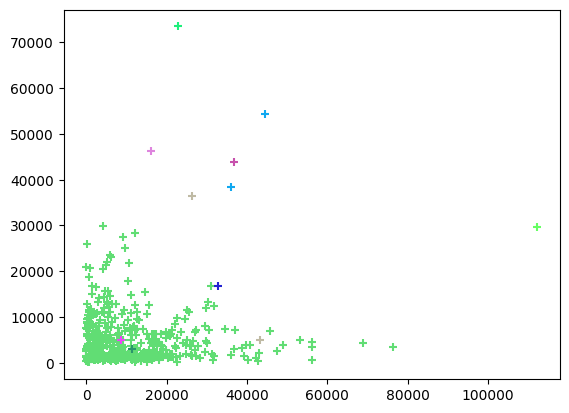

Fresh
Grocery





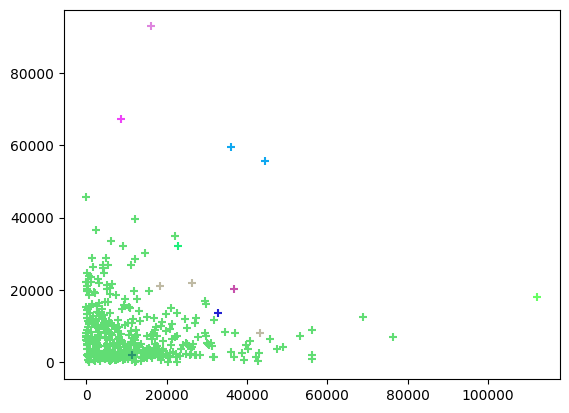

Fresh
Frozen





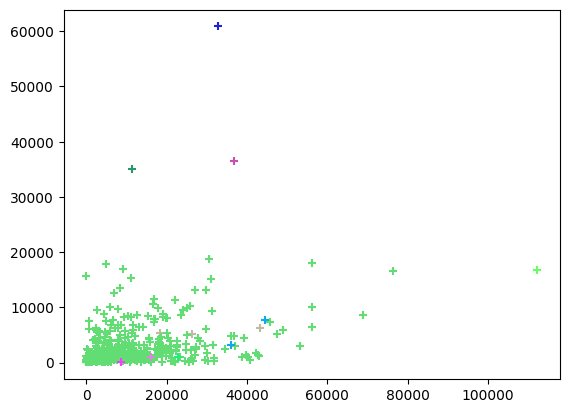

Fresh
Detergents_Paper





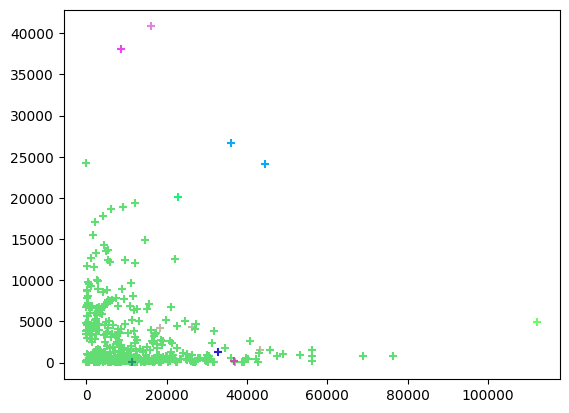

Fresh
Delicassen





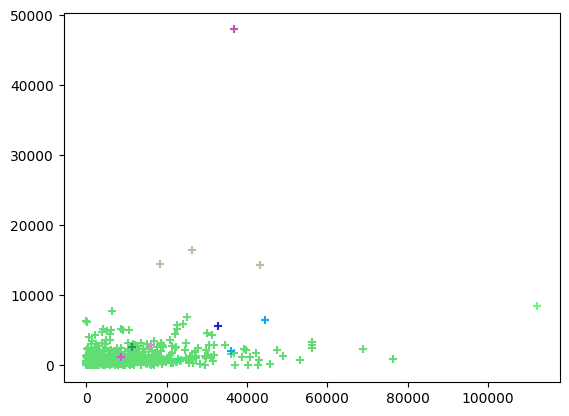

Milk
Grocery





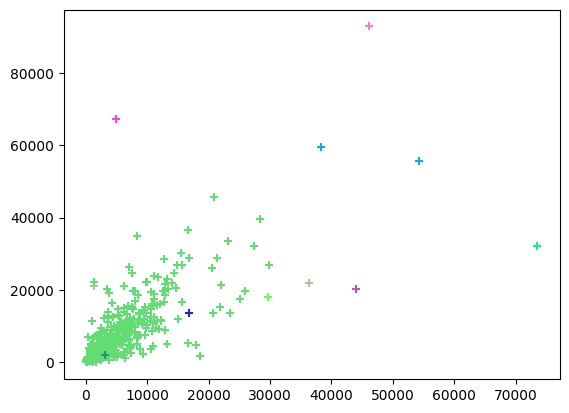

Milk
Frozen





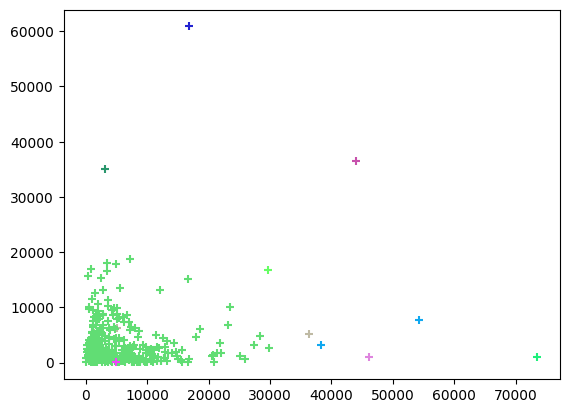

Milk
Detergents_Paper





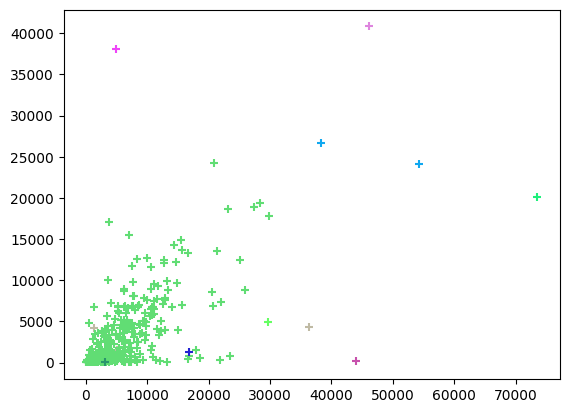

Milk
Delicassen





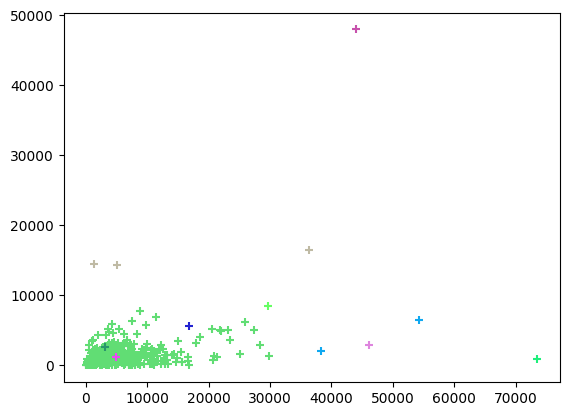

Grocery
Frozen





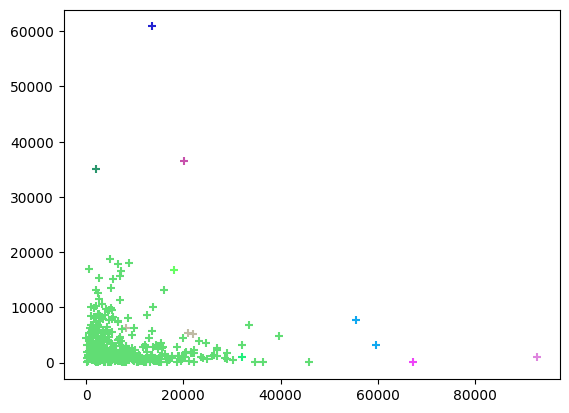

Grocery
Detergents_Paper





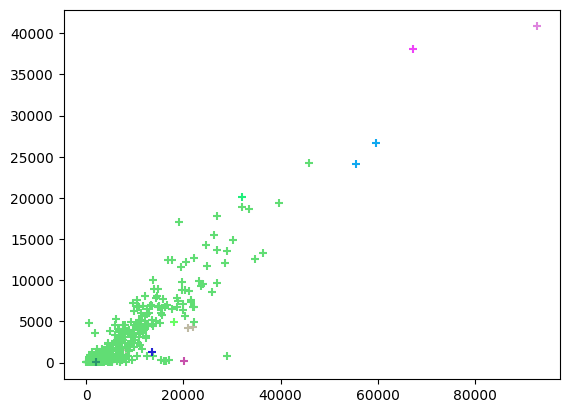

Grocery
Delicassen





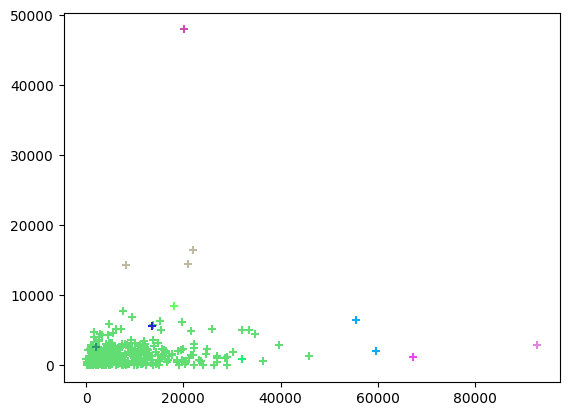

Frozen
Detergents_Paper





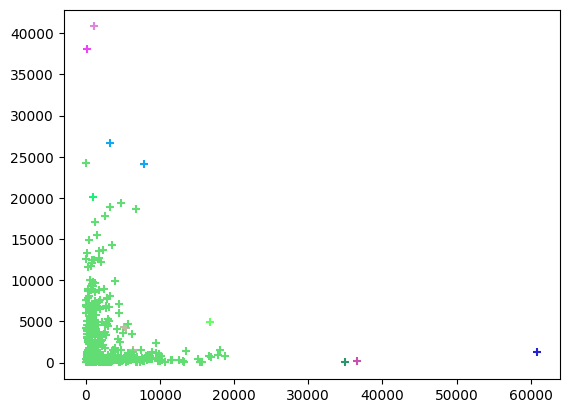

Frozen
Delicassen





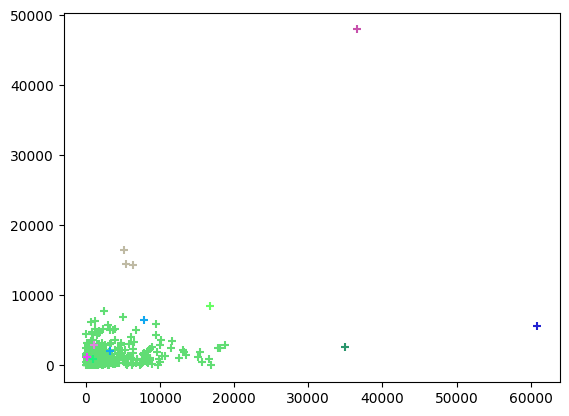

Detergents_Paper
Delicassen





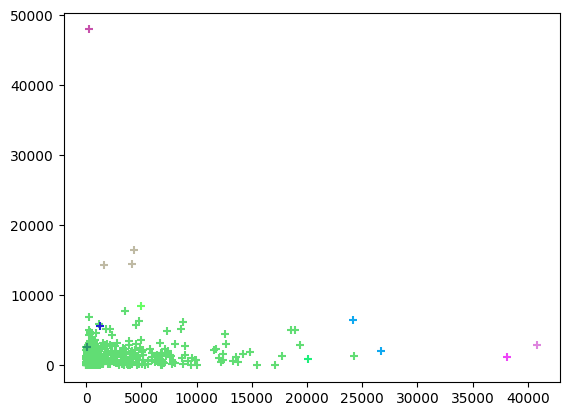

In [92]:
import numpy as np
colors = []
for i in range(0, km.n_clusters_):
        colors.append(np.random.rand(3,1).flatten())

for i in range(0, len(data.columns)):
        label_1 = data.columns[i]
        for j in range(i+1, len(data.columns)):
                label_2 = data.columns[j]
                print(label_1)
                print(label_2)
                print('\n\n')
                plot_cluster(km.labels_, colors, data.loc[:, (data.columns == label_1) | (data.columns == label_2)], km.n_clusters_)

In [91]:
x_boolean = km.labels_ == 0
x = data.loc[:, (data.columns == label_1) | (data.columns == label_2)]
x_filtered = x[x_boolean].to_numpy()

colors[0]

array([0.82718006, 0.95293138, 0.57093176])

In [81]:
label_2

'Fresh'